<a href="https://colab.research.google.com/github/HWANG-HOE-SUN/Code-/blob/main/DAPROG_%EC%88%98%ED%95%99%EC%BD%94%EB%93%9C%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from math import *
import numpy as np
import sys
import matplotlib.pyplot as plt

In [7]:
def DTW(A, B, window=sys.maxsize, d=lambda x, y: abs(x - y)):
  # 비용 행렬 초기화
  A, B = np.array(A), np.array(B)
  M, N = len(A), len(B)
  cost = sys.maxsize * np.ones((M, N))

  # 첫번째 로우,컬럼 채우기
  cost[0, 0] = d(A[0], B[0])
  for i in range(1, M):
    cost[i, 0] = cost[i - 1, 0] + d(A[i], B[0])

  for j in range(1, N):
    cost[0, j] = cost[0, j - 1] + d(A[0], B[j])
  # 나머지 행렬 채우기
  for i in range(1, M):
    for j in range(max(1, i - window), min(N, i + window)):
      choices = cost[i - 1, j - 1], cost[i, j - 1], cost[i - 1, j]
      cost[i, j] = min(choices) + d(A[i], B[j])

  # 최적 경로 구하기
  n, m = N - 1, M - 1
  path = []

  while (m, n) != (0, 0):
    path.append((m, n))
    m, n = min((m - 1, n), (m, n - 1), (m - 1, n - 1), key=lambda x: cost[x[0], x[1]])

  path.append((0, 0))

  return cost[-1, -1], path

In [3]:
def main():
  A = np.array([1,2,3,4,2,3])
  B = np.array([7,8,5,9,11,9])

  cost, path = DTW(A, B, window = 6)
  print('Total Distance is ', cost)

  offset = 5
  plt.xlim([-1, max(len(A), len(B)) + 1])
  plt.plot(A)
  plt.plot(B + offset)
  for (x1, x2) in path:
    plt.plot([x1, x2], [A[x1], B[x2] + offset])
  plt.show()


Total Distance is  34.0


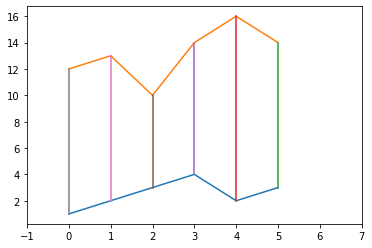

In [4]:
if __name__ == '__main__':
  main()

### DAPROG 코드 구현

In [19]:
A = np.array([4,6,5,4,2,7])
B = np.array([7,8,5,9,11,9])

dtw_result = DTW(A,B,window=6)

In [18]:
dtw_result[1] # Path Matching(index,index)

[(5, 5), (5, 4), (5, 3), (4, 2), (3, 2), (2, 2), (1, 1), (0, 0)]

Total Distance is  17.0


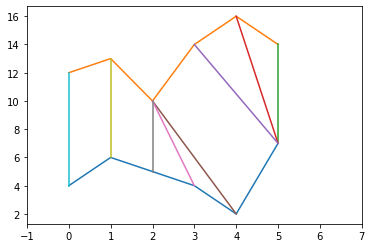

In [21]:
cost, path = DTW(A, B, window = 6)
print('Total Distance is ', cost)

offset = 5
plt.xlim([-1, max(len(A), len(B)) + 1])
plt.plot(A)
plt.plot(B + offset)
for (x1, x2) in path:
  plt.plot([x1, x2], [A[x1], B[x2] + offset])
plt.show()

In [30]:
path.reverse() # 마지막 매칭부터 되어있으므로 리스트 순서를 뒤집는다.
path

[(0, 0), (1, 1), (2, 2), (3, 2), (4, 2), (5, 3), (5, 4), (5, 5)]

In [34]:
[x[0] for x in path], [x[1] for x in path]

([0, 1, 2, 3, 4, 5, 5, 5], [0, 1, 2, 2, 2, 3, 4, 5])

In [37]:
x_train = np.array([x[0] for x in path])
y_train = np.array([x[1] for x in path])

In [39]:
# 그라디언트 부스트 방식으로 선형회귀 수행

W = 0.0
b = 0.0

n_data = len(x_train)

epochs = 5000
learning_rate = 0.01

for i in range(epochs):
    hypothesis = x_train * W + b
    cost = np.sum((hypothesis - y_train) ** 2) / n_data
    gradient_w = np.sum((W * x_train - y_train + b) * 2 * x_train) / n_data
    gradient_b = np.sum((W * x_train - y_train + b) * 2) / n_data

    W -= learning_rate * gradient_w
    b -= learning_rate * gradient_b

    if i % 100 == 0:
        print('Epoch ({:10d}/{:10d}) cost: {:10f}, W: {:10f}, b:{:10f}'.format(i, epochs, cost, W, b))

print('W: {:10f}'.format(W))
print('b: {:10f}'.format(b))
print('result : ')
print(x_train * W + b)

Epoch (         0/      5000) cost:   7.875000, W:   0.197500, b:  0.047500
Epoch (       100/      5000) cost:   0.443636, W:   0.718428, b:  0.141687
Epoch (       200/      5000) cost:   0.443255, W:   0.722966, b:  0.122982
Epoch (       300/      5000) cost:   0.443111, W:   0.725759, b:  0.111466
Epoch (       400/      5000) cost:   0.443057, W:   0.727478, b:  0.104377
Epoch (       500/      5000) cost:   0.443036, W:   0.728537, b:  0.100013
Epoch (       600/      5000) cost:   0.443028, W:   0.729189, b:  0.097326
Epoch (       700/      5000) cost:   0.443025, W:   0.729590, b:  0.095672
Epoch (       800/      5000) cost:   0.443024, W:   0.729837, b:  0.094654
Epoch (       900/      5000) cost:   0.443024, W:   0.729989, b:  0.094027
Epoch (      1000/      5000) cost:   0.443023, W:   0.730083, b:  0.093641
Epoch (      1100/      5000) cost:   0.443023, W:   0.730140, b:  0.093404
Epoch (      1200/      5000) cost:   0.443023, W:   0.730176, b:  0.093257
Epoch (     

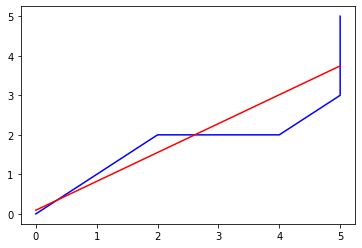

In [55]:
plt.plot(x_train,y_train,'b') # 참값(실제 DTW매칭)
plt.plot(x_train,x_train * W + b,'r') # DTW매칭에 대한 선형 회귀